In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [2]:
#load data
data = pd.read_csv("..\..\Data\Day\S&P 500 Historical Data00-20.csv")

In [3]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [5]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

In [8]:
special_data = pd.DataFrame(data)

In [9]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [10]:
#change indexes
special_data.set_index('Date', inplace = True)

In [12]:
data.head(10)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [41]:
special_data.head(10)

,Open,High,Low,Close,Timestamp
Date,,,,,
2010-01-04 17:32:00,1122.87,1123.80,1122.87,1123.80,2010-01-04 17:32:00
2010-01-04 17:33:00,1123.95,1124.18,1123.95,1124.18,2010-01-04 17:33:00
2010-01-04 17:34:00,1124.27,1124.27,1124.07,1124.07,2010-01-04 17:34:00
2010-01-04 17:35:00,1124.17,1124.26,1124.17,1124.26,2010-01-04 17:35:00
2010-01-04 17:36:00,1124.63,1124.63,1124.63,1124.63,2010-01-04 17:36:00
2010-01-04 17:37:00,1126.30,1126.30,1126.18,1126.29,2010-01-04 17:37:00
2010-01-04 17:38:00,1126.50,1126.75,1126.50,1126.75,2010-01-04 17:38:00
2010-01-04 17:39:00,1126.69,1126.74,1126.68,1126.68,2010-01-04 17:39:00
2010-01-04 17:40:00,1126.54,1126.64,1126.54,1126.64,2010-01-04 17:40:00


In [13]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2010-01-04,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1132.99,1132.99
2010-01-05,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1136.52,1136.52
2010-01-06,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1137.14,1137.14
2010-01-07,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1141.69,1141.69
2010-01-08,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1144.98,1144.98


In [14]:
import datetime

special_data.loc[0, 'new_index'] = 1262563200
special_data.loc[0, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[0, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.loc[i, 'new_index'] = special_data.new_index[i - 1] + 86400
        special_data.loc[i, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[i, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')

In [15]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [16]:
special_data.head(20)

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1.262563e+09
2010-01-05 07:00:00,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1.262650e+09
2010-01-06 07:00:00,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1.262736e+09
2010-01-07 07:00:00,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1.262822e+09
2010-01-08 07:00:00,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1.262909e+09
2010-01-09 07:00:00,1146.98,1145.96,1149.74,1142.02,0.17%,01/11/2010,1.262995e+09
2010-01-10 07:00:00,1136.22,1143.81,1143.81,1131.77,-0.94%,01/12/2010,1.263082e+09
2010-01-11 07:00:00,1145.68,1137.31,1148.40,1133.18,0.83%,01/13/2010,1.263168e+09
2010-01-12 07:00:00,1148.46,1145.68,1150.41,1143.80,0.24%,01/14/2010,1.263254e+09


In [19]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [20]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

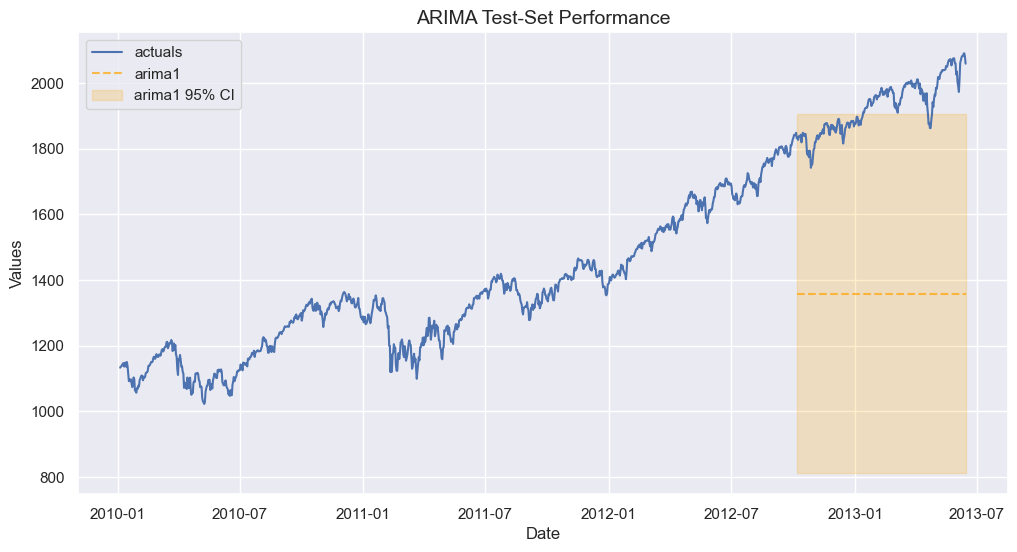

In [21]:
f.generate_future_dates(100) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

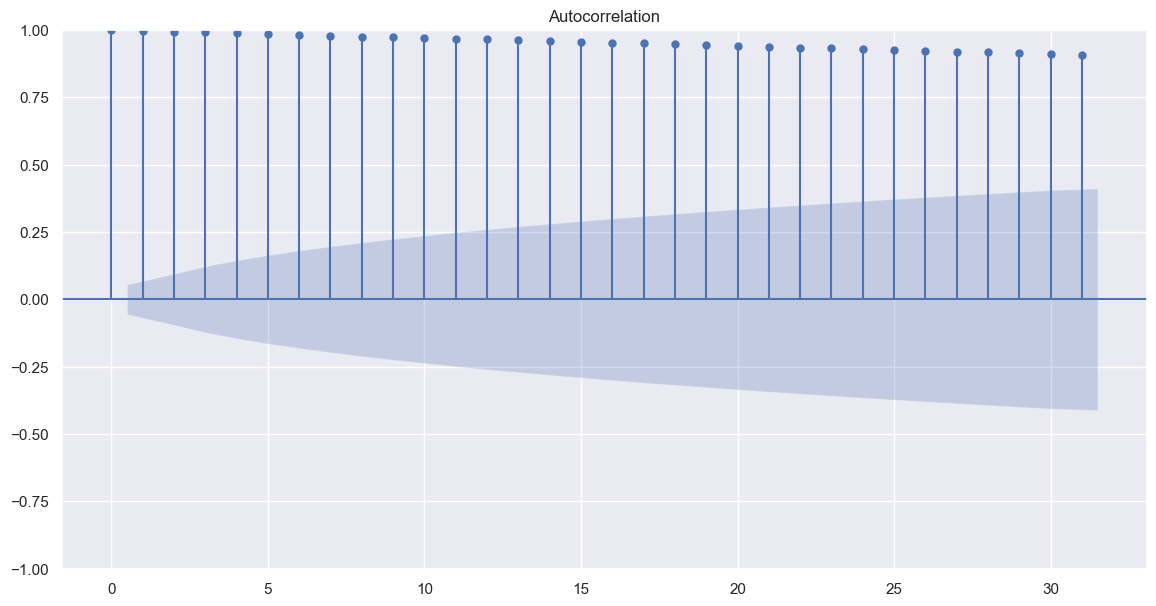

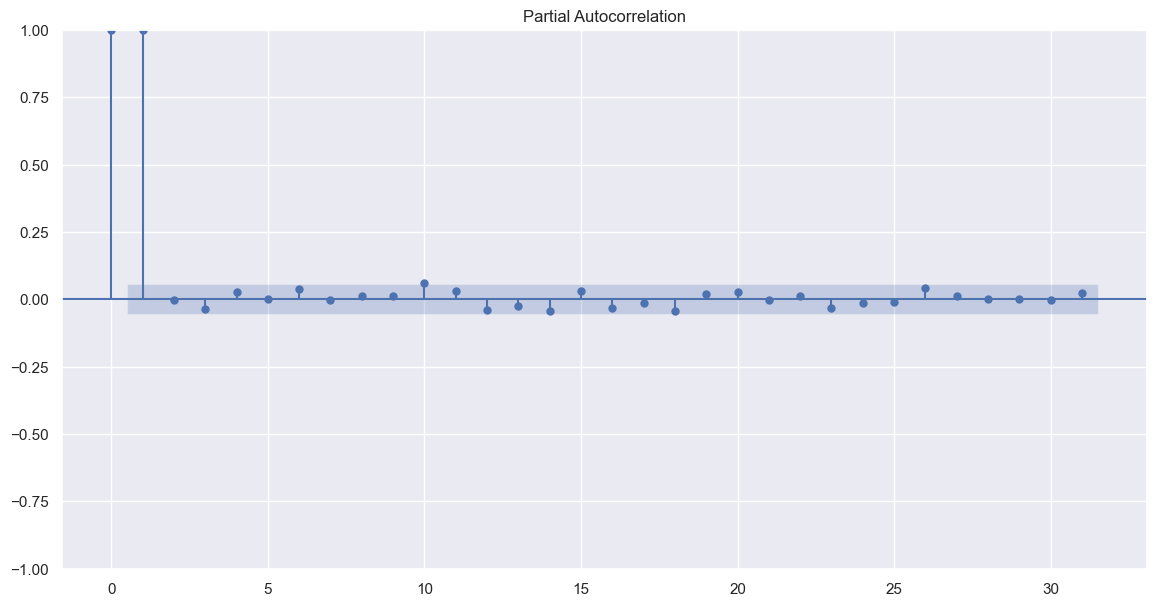

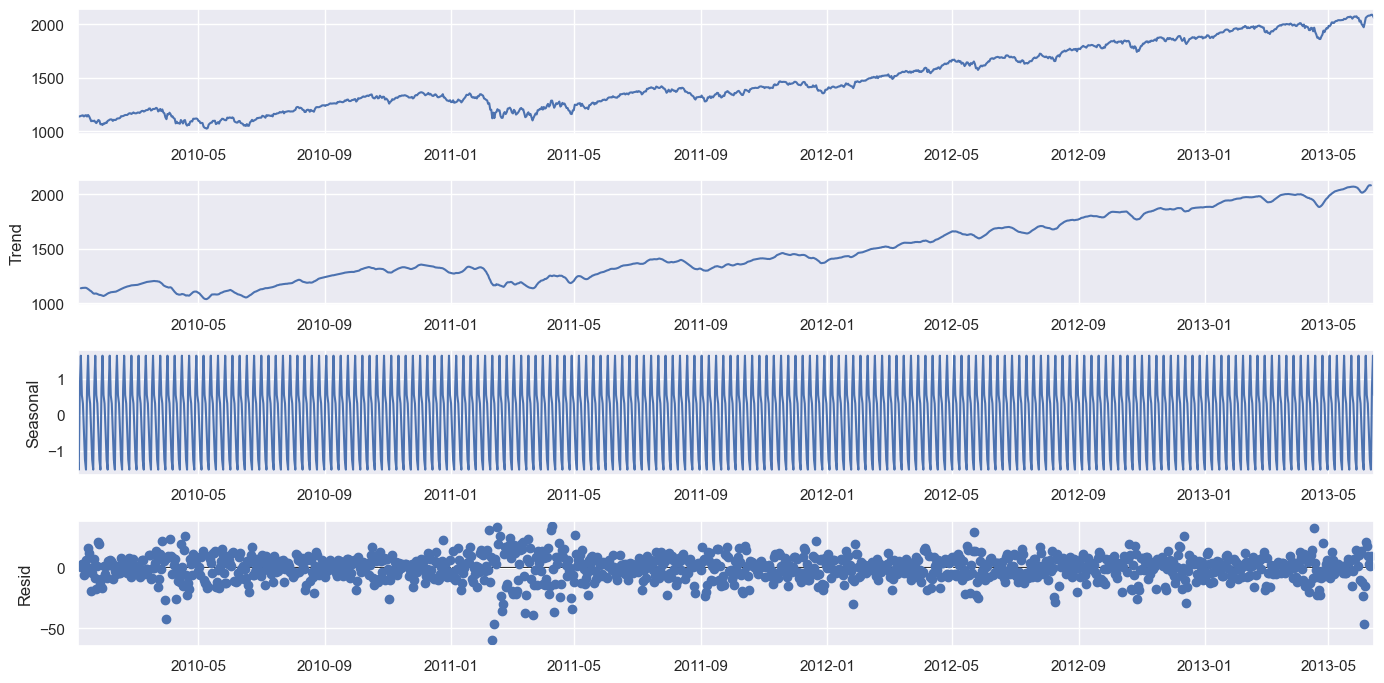

0.2766677391616034
0.9762483249209334


In [22]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

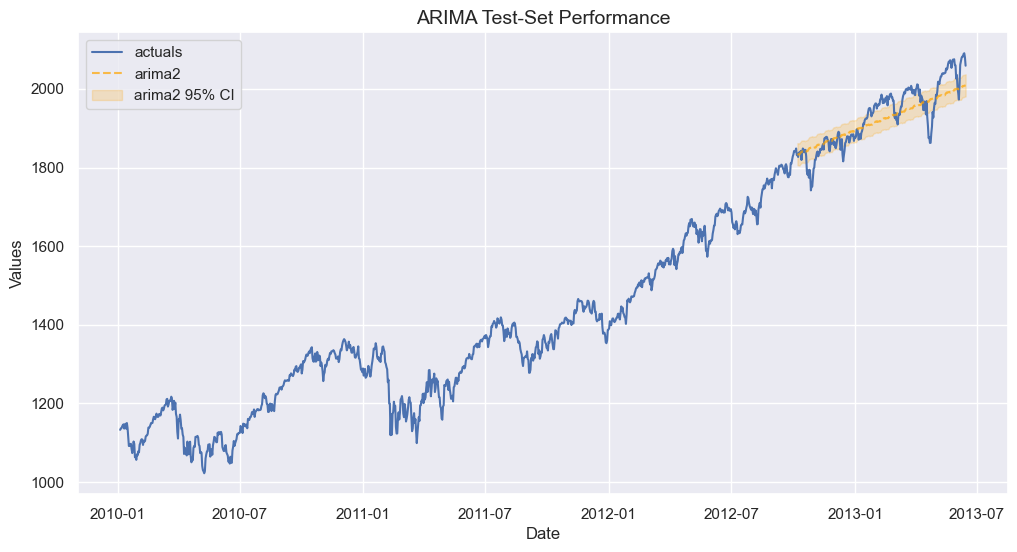

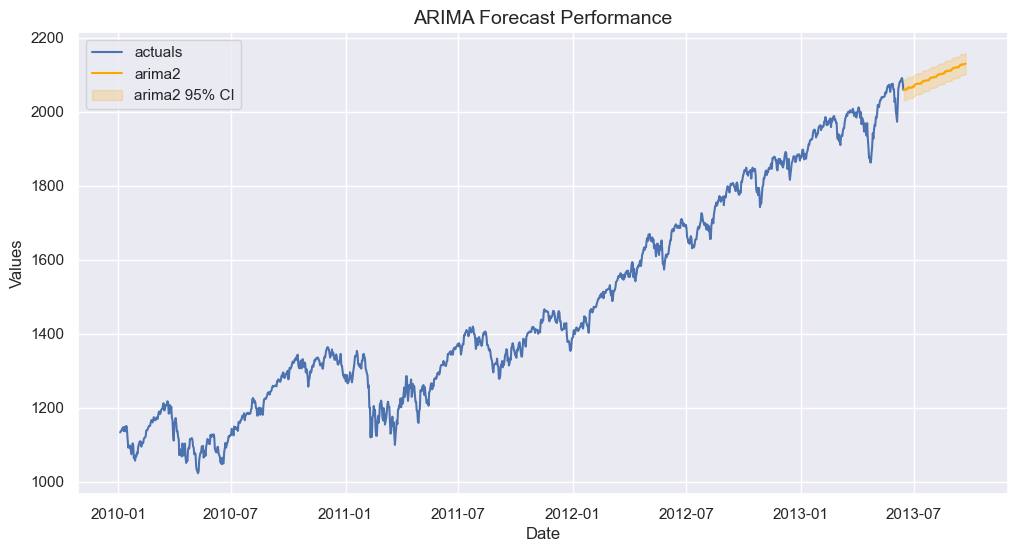

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                 1258
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5031.638
Date:                          Sat, 14 Oct 2023   AIC                          10077.276
Time:                                  23:38:27   BIC                          10113.164
Sample:                                       0   HQIC                         10090.770
                                         - 1258                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8177      0.098     -8.334      0.000      -1.010      -0.625
ar.L2          0.0151      0.028      0.534      0.594      -0.040       0.070
ma.L1          0.7768      0.095      8.154      0.000       0.590       0.963
ar.S.L12      -0.0140      0.026     -0.534      0.594      -0.066       0.037
ar.S.L24       0.0255      0.030      0.849      0.396      -0.033       0.084
ma.S.L12      -0.9998      0.923     -1.084      0.279      -2.808       0.808
sigma2       181.4583    166.207      1.092      0.275    -144.301     507.217
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               273.70
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.32
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [109]:
adf_test(special_data['Close'])

1. ADF :  0.2766677391616034
2. P-Value :  0.9762483249209334
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1252
5. Critical Values :
	 1% :  -3.4355838322867998
	 5% :  -2.863851267837805
	 10% :  -2.5680005460145554


In [110]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10110.721, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10119.813, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10118.627, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10118.867, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10121.534, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10114.366, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10114.372, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10111.641, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10111.662, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10112.518, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10116.047, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10116.083, Time=0.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10113.555, Time=0.75 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10116.562, Time=0.20 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5049.360
Date:                Sun, 15 Oct 2023   AIC                          10110.721
Time:                        01:23:23   BIC                          10141.540
Sample:                    01-04-2010   HQIC                         10122.303
                         - 06-14-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0585      0.033      1.772      0.076      -0.006       0.123
ar.L1          0.1008      0.073      1.381      0.167      -0.042       0.244
ar.L2          0.8208      0.068     12.023      0.000       0.687       0.955
ma.L1         -0.1668      0.081     -2.057      0.040      -0.326      -0.008
ma.L2         -0.7924      0.078    -10.188      0.000      -0.945      -0.640
sigma2       180.5536      5.147     35.077      0.000     170.465     190.642
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               373.80
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.53
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
data_len = len(special_data)

In [28]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [29]:
train_data = special_data.iloc[:int(train_len)]

In [68]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [71]:
test_data.Close

new_date
2012-06-02 07:00:00    1615.41
2012-06-03 07:00:00    1631.89
2012-06-04 07:00:00    1640.46
2012-06-05 07:00:00    1652.32
2012-06-06 07:00:00    1652.62
                        ...   
2013-06-10 07:00:00    2081.88
2013-06-11 07:00:00    2088.77
2013-06-12 07:00:00    2090.57
2013-06-13 07:00:00    2080.35
2013-06-14 07:00:00    2058.90
Name: Close, Length: 378, dtype: float64

In [129]:
train_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1.262563e+09
2010-01-05 07:00:00,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1.262650e+09
2010-01-06 07:00:00,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1.262736e+09
2010-01-07 07:00:00,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1.262822e+09
2010-01-08 07:00:00,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1.262909e+09
...,...,...,...,...,...,...,...
2012-05-28 07:00:00,1603.26,1592.27,1606.83,1592.27,0.96%,06/26/2013,1.338163e+09
2012-05-29 07:00:00,1613.20,1606.44,1620.07,1606.44,0.62%,06/27/2013,1.338250e+09
2012-05-30 07:00:00,1606.28,1611.12,1615.94,1601.06,-0.43%,06/28/2013,1.338336e+09


In [136]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=7119.885, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=7117.732, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=7118.668, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=7115.745, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=7117.744, Time=0.19 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=7107.409, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=7117.422, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=7111.254, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=7113.201, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=7113.680, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=7115.516, Time=0.34 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=7109.337, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=7118.008, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=7113.206, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=7112.177, Time=0.27 sec
 ARIMA(2,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  880
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -3538.950
Date:                Sun, 15 Oct 2023   AIC                           7101.900
Time:                        01:50:07   BIC                           7159.246
Sample:                    01-04-2010   HQIC                          7123.831
                         - 06-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5810      0.450      1.290      0.197      -0.301       1.463
ar.L1          0.1499      0.116      1.290      0.197      -0.078       0.378
ar.L2          0.0991      0.109      0.906      0.365      -0.115       0.313
ar.L3          0.4097      0.069      5.918      0.000       0.274       0.545
ar.L4          0.0763      0.095      0.800      0.424      -0.111       0.263
ar.L5         -0.7301      0.099     -7.409      0.000      -0.923      -0.537
ma.L1         -0.2062      0.128     -1.607      0.108      -0.458       0.045
ma.L2         -0.0685      0.113     -0.605      0.545      -0.290       0.153
ma.L3         -0.4956      0.071     -7.027      0.000      -0.634      -0.357
ma.L4         -0.0119      0.112     -0.106      0.915      -0.230       0.207
ma.L5          0.6404      0.110      5.828      0.000       0.425       0.856
sigma2       183.2336      6.424     28.523      0.000     170.643     195.824
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               268.52
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.52
Prob(H) (two-sided):                  0.48   Kurtosis:                         5.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

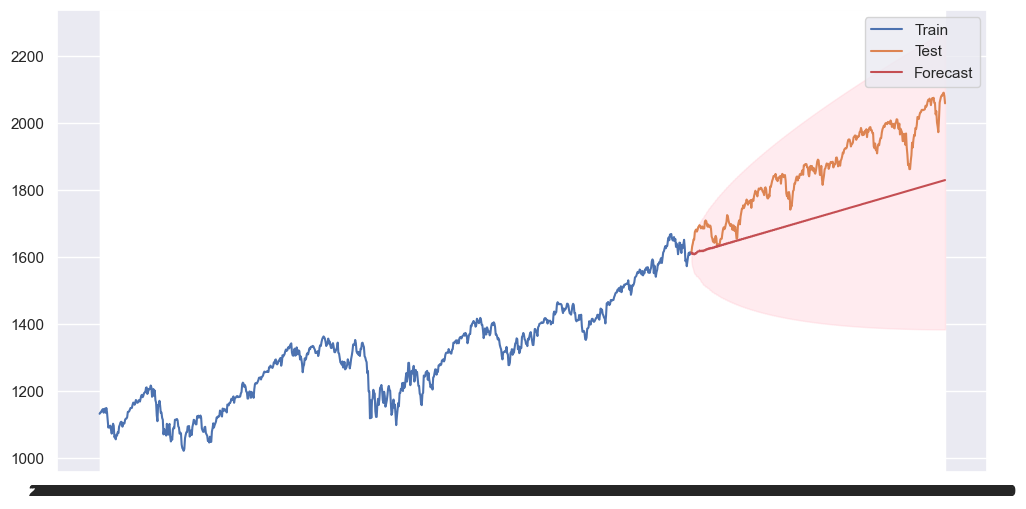

In [137]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [79]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data.Close, order=(2, 1, 2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  880
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3551.242
Date:                Sun, 15 Oct 2023   AIC                           7112.484
Time:                        01:00:03   BIC                           7136.378
Sample:                    01-04-2010   HQIC                          7121.622
                         - 06-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0296      0.185     -0.160      0.873      -0.393       0.334
ar.L2          0.7094      0.152      4.657      0.000       0.411       1.008
ma.L1         -0.0562      0.180     -0.313      0.755      -0.408       0.296
ma.L2         -0.6859      0.138     -4.988      0.000      -0.955      -0.416
sigma2       189.0962      6.400     29.546      0.000     176.552     201.640
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               283.94
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.52
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Price')

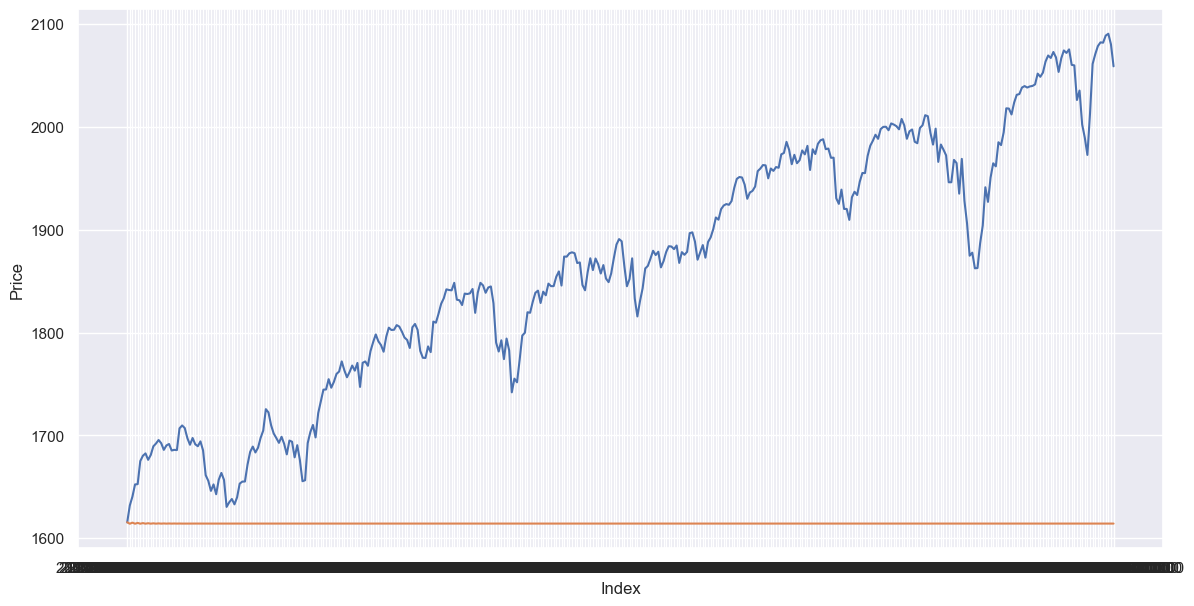

In [80]:
start=test_data.index[0]
end=test_data.index[len(test_data)-1]
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, pred)
plt.xlabel('Index')
plt.ylabel('Price')

In [81]:
pred

2012-06-02 07:00:00    1615.542258
2012-06-03 07:00:00    1614.094814
2012-06-04 07:00:00    1615.175003
2012-06-05 07:00:00    1614.116200
2012-06-06 07:00:00    1614.913840
                          ...     
2013-06-10 07:00:00    1614.261499
2013-06-11 07:00:00    1614.261499
2013-06-12 07:00:00    1614.261499
2013-06-13 07:00:00    1614.261499
2013-06-14 07:00:00    1614.261499
Freq: D, Name: ARIMA predictions, Length: 378, dtype: float64

In [105]:
test = list()
temper = pd.DataFrame(train_data.Close)
for i in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(temper, order=(2, 1, 2))
    model = model.fit()
    start=test_data.index[i]
    end=test_data.index[len(test_data)-1]
    #if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
    #index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
    pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
    temper.loc[start] = pred[0]
    test.append(pred[0])

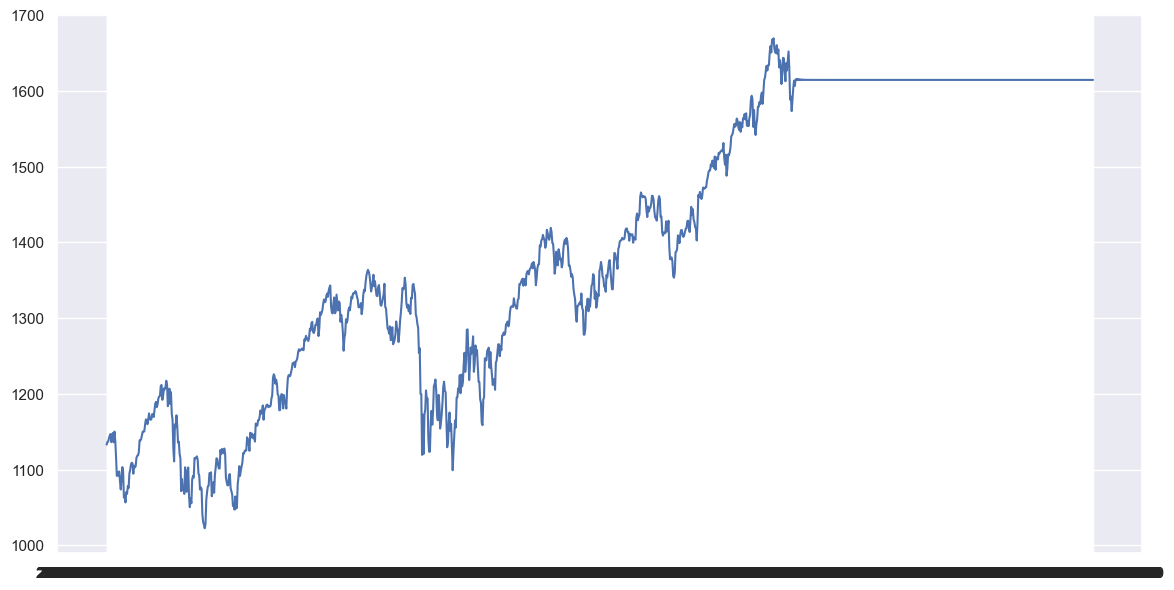

In [108]:
plt.plot(temper)

In [107]:
temper

,Close
new_date,
2010-01-04 07:00:00,1132.990000
2010-01-05 07:00:00,1136.520000
2010-01-06 07:00:00,1137.140000
2010-01-07 07:00:00,1141.690000
2010-01-08 07:00:00,1144.980000
...,...
2013-06-10 07:00:00,1614.260966
2013-06-11 07:00:00,1614.260966
2013-06-12 07:00:00,1614.260966


In [106]:
test

[1615.5422584664027,
 1614.094496762219,
 1615.1741986257791,
 1614.1153280392618,
 1614.9123072865457,
 1614.137552749393,
 1614.7263847755494,
 1614.1591069723763,
 1614.5936347503857,
 1614.1785138794246,
 1614.4991540294682,
 1614.195114912086,
 1614.4313053292392,
 1614.2093747058527,
 1614.3842027021947,
 1614.2210762747975,
 1614.349587256131,
 1614.230076638892,
 1614.3249106516728,
 1614.2373223560555,
 1614.3070138788362,
 1614.2427813780753,
 1614.2941786079307,
 1614.247058477925,
 1614.2849229742917,
 1614.250389692137,
 1614.2782446404603,
 1614.2529458113443,
 1614.2734683540098,
 1614.254895981264,
 1614.2699983269977,
 1614.2563959496463,
 1614.2675175981965,
 1614.2575308993016,
 1614.26571173398,
 1614.258379878356,
 1614.264407093832,
 1614.2590264884154,
 1614.263461435478,
 1614.2595154688656,
 1614.2627802074155,
 1614.2598835460587,
 1614.2622848694887,
 1614.2601570925974,
 1614.2619281926316,
 1614.260365804858,
 1614.2616649920567,
 1614.260519229083,
 1614.2

In [82]:
test_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2012-06-02 07:00:00,1615.41,1611.48,1618.97,1604.57,0.08%,07/03/2013,1.338595e+09
2012-06-03 07:00:00,1631.89,1618.65,1632.07,1614.71,1.02%,07/05/2013,1.338682e+09
2012-06-04 07:00:00,1640.46,1634.20,1644.68,1634.20,0.53%,07/08/2013,1.338768e+09
2012-06-05 07:00:00,1652.32,1642.89,1654.18,1642.89,0.72%,07/09/2013,1.338854e+09
2012-06-06 07:00:00,1652.62,1651.56,1657.92,1647.66,0.02%,07/10/2013,1.338941e+09
...,...,...,...,...,...,...,...
2013-06-10 07:00:00,2081.88,2083.25,2087.56,2081.86,-0.01%,12/24/2014,1.370822e+09
2013-06-11 07:00:00,2088.77,2084.30,2092.70,2084.30,0.33%,12/26/2014,1.370909e+09
2013-06-12 07:00:00,2090.57,2087.63,2093.55,2085.75,0.09%,12/29/2014,1.370995e+09


Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=6516.582, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6517.281, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6517.793, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6518.058, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6516.458, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6519.209, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=6519.214, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6521.052, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6515.901, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=6517.801, Time=0.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6519.641, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=6516.370, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6510.960, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=6512.934, Time=0.41 sec
 ARIMA(1,1,1)(0,0,1

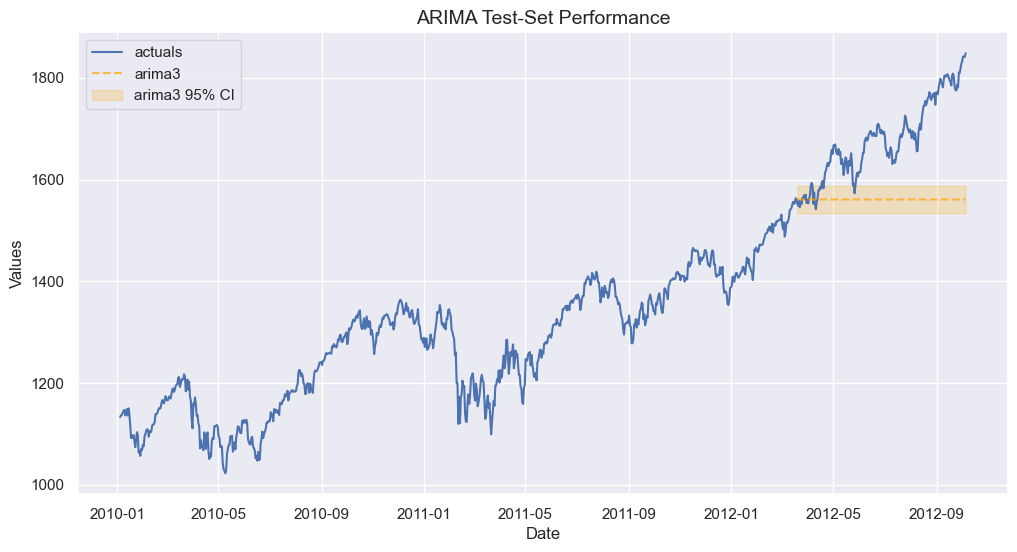

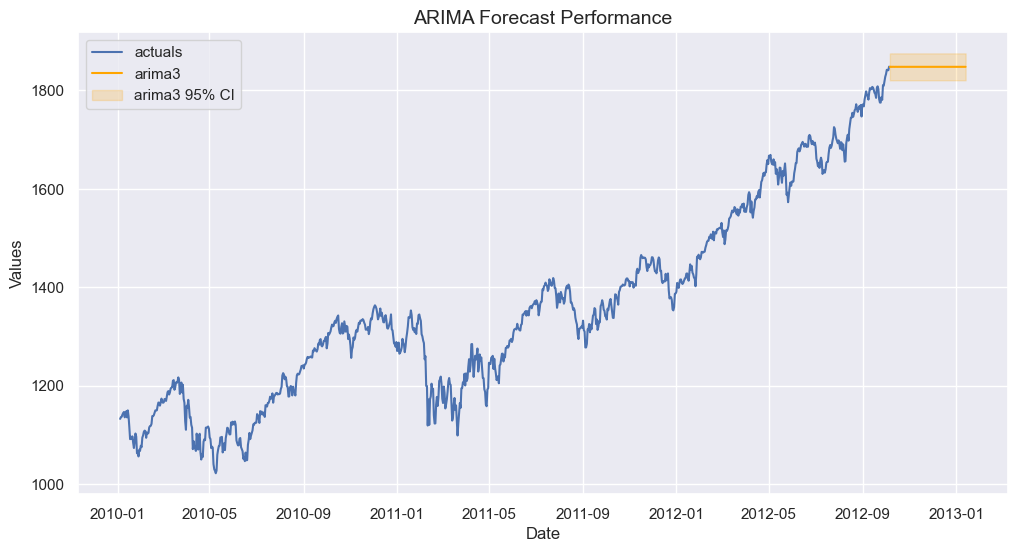

In [36]:
from scalecast.auxmodels import auto_arima

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [37]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4035.755
Date:                Sun, 13 Nov 2022   AIC                           8077.510
Time:                        12:08:16   BIC                           8092.248
Sample:                             0   HQIC                          8083.110
                               - 1006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8444      0.066    -12.706      0.000      -0.975      -0.714
ma.L1          0.7846      0.078     10.119      0.000       0.633       0.937
sigma2       180.0879      5.647     31.892      0.000     169.021     191.155
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               284.21
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.40
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

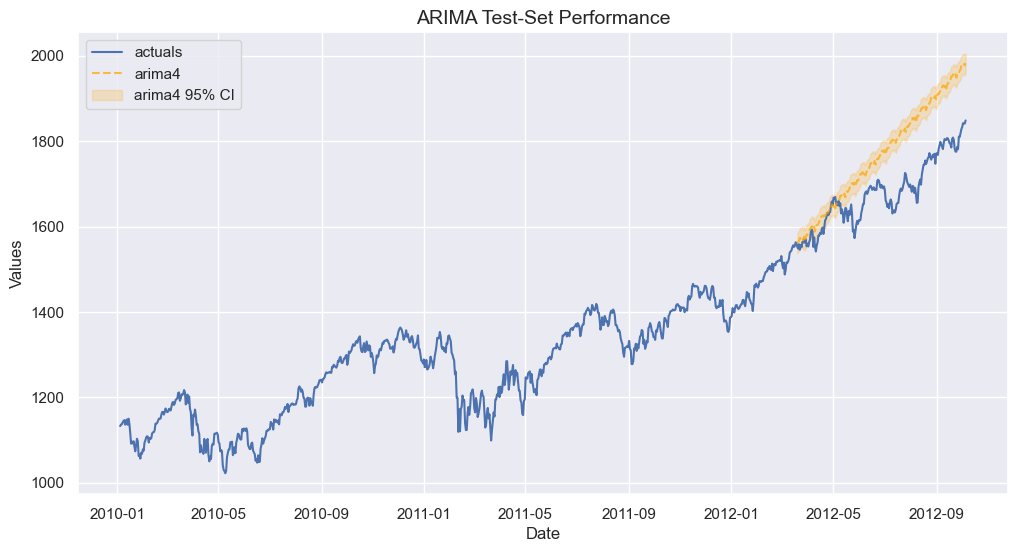

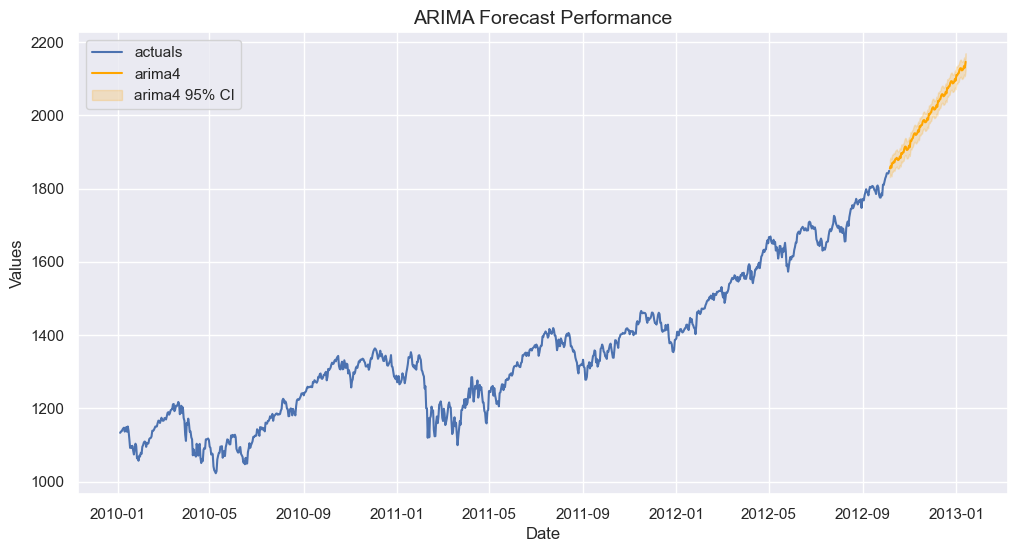

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1006
Model:             ARIMA(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -4128.370
Date:                           Sun, 13 Nov 2022   AIC                           8266.740
Time:                                   12:23:30   BIC                           8291.244
Sample:                                        0   HQIC                          8276.057
                                          - 1006                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8405      0.072    -11.646      0.000      -0.982      -0.699
ma.L1          0.7752      0.084      9.254      0.000       0.611       0.939
ar.S.L12      -0.6880      0.028    -24.779      0.000      -0.742      -0.634
ar.S.L24      -0.3141      0.027    -11.620      0.000      -0.367      -0.261
sigma2       237.6471      7.673     30.973      0.000     222.609     252.685
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               227.13
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.25
Prob(H) (two-sided):                  0.70   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [39]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [40]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima2,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.009163,0.037620
1,arima4,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 0, 12)}",0.010164,0.053786
2,arima3,"{'order': (1, 1, 1), 'seasonal_order': (0, 0, 0, 12), 'trend': None}",0.008407,0.068865
3,arima1,{},0.117585,0.237339
